In [1]:
import tensorflow

In [2]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten

In [3]:
import numpy as np

In [4]:
x = np.load('training_spectrograms_X.npy')

In [5]:
y = np.load('training_y.npy')

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(5,kernel_size=3, activation='relu',input_shape=(1025,173,1)))

In [8]:
model.add(Conv2D(10,kernel_size=3, activation='relu'))

In [9]:
model.add(Conv2D(20,kernel_size=3, activation='relu'))

In [10]:
model.add(Conv2D(30,kernel_size=3, activation='relu'))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [22]:
hist = model.fit(x,y,epochs=10, batch_size=32)

Epoch 1/10
4561/4561 [==============================] - 367s - loss: 2.2829     

In [23]:
hist.history

{'loss': [2.2829213741447183,
  2.2240601789269157,
  1.5704203241620507,
  0.39155646456200105,
  0.15661605672448925,
  0.095170771331289275,
  0.098112363333684463,
  0.087415752529591551,
  0.081320216809191409,
  0.084598114221800039]}

In [25]:
import matplotlib.pyplot as plt

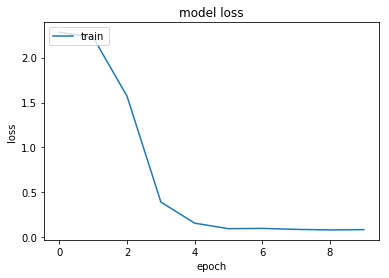

In [26]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
saved_weights = model.get_weights()


In [17]:
saved_weights[2].shape

(3, 3, 5, 10)

In [18]:
saved_weights[0].shape
np.save('layer_1',saved_weights[0])
np.save('layer_2',saved_weights[2])
np.save('layer_3',saved_weights[4])

In [19]:
np.save('saved_weights',saved_weights)

In [20]:
model.save_weights('my_model_weights.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1023, 171, 5)      50        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1021, 169, 10)     460       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1019, 167, 20)     1820      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1017, 165, 30)     5430      
_________________________________________________________________
flatten_1 (Flatten)          (None, 5034150)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50341510  
Total params: 50,349,270
Trainable params: 50,349,270
Non-trainable params: 0
________________________________________________________________